# Task 2: Show the share of each party in Scottish Parliament as a Pie Chart

- You should use the dataset provided in data/Parliament.csv
- The dataset will show the party of each MSP, not the total count of each party. You'll have to calculate that yourself
- Make sure each bar and both axes are properly labeled, and the values sum to 100%.

In [2]:
#Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#Begin by loading the raw data into a dataframe
raw_data = pd.read_csv("data/Parliament.csv")

#Let's take a look
raw_data

,Person ID,First name,Last name,Party,Constituency,URI
0,10001,Diane,Abbott,Labour,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...
1,25034,Debbie,Abrahams,Labour,Oldham East and Saddleworth,https://www.theyworkforyou.com/mp/25034/debbie...
2,24878,Nigel,Adams,Conservative,Selby and Ainsty,https://www.theyworkforyou.com/mp/24878/nigel_...
3,25661,Bim,Afolami,Conservative,Hitchin and Harpenden,https://www.theyworkforyou.com/mp/25661/bim_af...
4,11929,Adam,Afriyie,Conservative,Windsor,https://www.theyworkforyou.com/mp/11929/adam_a...
...,...,...,...,...,...,...
645,11791,Jeremy,Wright,Conservative,Kenilworth and Southam,https://www.theyworkforyou.com/mp/11791/jeremy...
646,25649,Mohammad,Yasin,Labour,Bedford,https://www.theyworkforyou.com/mp/25649/mohamm...
647,25806,Jacob,Young,Conservative,Redcar,https://www.theyworkforyou.com/mp/25806/jacob_...
648,24822,Nadhim,Zahawi,Conservative,Stratford-on-Avon,https://www.theyworkforyou.com/mp/24822/nadhim...


Right, that's a lot of information. We don't need most of it for our tasks. Let's start by pulling out the part we need.

In [4]:
parties = raw_data["Party"]
parties

0            Labour
1            Labour
2      Conservative
3      Conservative
4      Conservative
           ...     
645    Conservative
646          Labour
647    Conservative
648    Conservative
649          Labour
Name: Party, Length: 650, dtype: object

Great, and we can see it's the right length (650) to boot. Now we need to count these up. You could do it manually, but 650 is a lot of MSP's, and it'd be much easier to do it with a bit of code. I don't remember the name of the function, so I'm going to Google for "count frequency pandas". Remember, pandas is the library that handles these 'dataframes', the tables that hold the data.

The first result is [this article](https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column). The answer says to use value_counts(), so that's what we'll do. 

In [5]:
party_counts = parties.value_counts().to_dict()
party_counts

{'Conservative': 364,
 'Labour': 176,
 'Scottish National Party': 47,
 'Labour/Co-operative': 24,
 'Liberal Democrat': 11,
 'DUP': 8,
 'Sinn Féin': 7,
 'Independent': 5,
 'Plaid Cymru': 3,
 'Social Democratic and Labour Party': 2,
 'Green': 1,
 'Alliance': 1,
 'Speaker': 1}

Great! That "to_dict()" bit turned our data into a dictionary, which in Python means a bunch of pairs of variables. The first half of each pair is called the "key" and the second half is called the "value".

In [40]:
x = list(party_counts.keys())
y = list(party_counts.values())
y

[364, 176, 47, 24, 11, 8, 7, 5, 3, 2, 1, 1, 1]

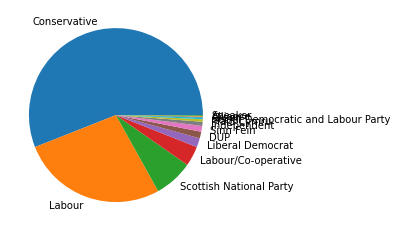

In [41]:
#Plot this bad boy
plt.pie(y, labels=x)
plt.show()

Alright, well that's... something. It looks like the right sizes for the slices, but the labels are all stacked on top of each other. PyPlot is really simple and powerful, but it's not too smart.

Let's go back to Google. Since we have a lot of smaller categories, using an 'Other' category makes sense. Searching for 'matplolib pie chart other' brings up [this article](https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories/48589225). They use a DataFrame instead of lists, but we can amend their code and go from there.

[364 176  47  24  39]
['Conservative' 'Labour' 'Scottish National Party' 'Labour/Co-operative'
 'Other']


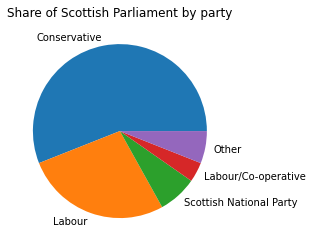

In [45]:

y = np.append(y[:4], np.sum(y[4:]))
x = np.append(x[:4], "Other")
print(y)
print(x)

plt.pie(y, labels=x)
plt.title("Share of Scottish Parliament by party")
plt.show()

Looks great! Keep in mind you can write those first two lines in many more. If you're only using this code for the purposes of producing a graph, it doesn't need to be pretty or concise, it just needs to make the graph you want.

One last thing: Let's convert those seat counts to percentages, and show them in the slices. [This article](https://www.askpython.com/python/plot-customize-pie-chart-in-python) has lots of useful ideas, but it shows we can use 'autopct' as an argument when we call plt.pie() to automatically calculate the percentages.

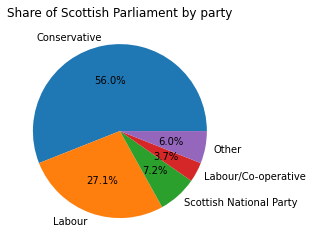

In [47]:
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title("Share of Scottish Parliament by party")
plt.show()

There you have it! 